In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.datasets import fetch_california_housing

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [14]:
raw_data=fetch_california_housing()

In [15]:
data=pd.DataFrame(raw_data.data,columns=raw_data.feature_names)

In [16]:
data.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [17]:
data['MedHouseVal']=raw_data.target

In [18]:
data.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [23]:
cor=data.corr()
cor

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.013344    -0.046701  
Population  -0.108785   0.099773    -0.024650  
AveOccup     0.002366   0.002476    -0.023737  
Latitude     1.000000  -0.924664    -0.144160  
Longitude   -0.924664   1.000000    -0.045967  
MedHouseVal -0.144160  -0.045967     1.000000

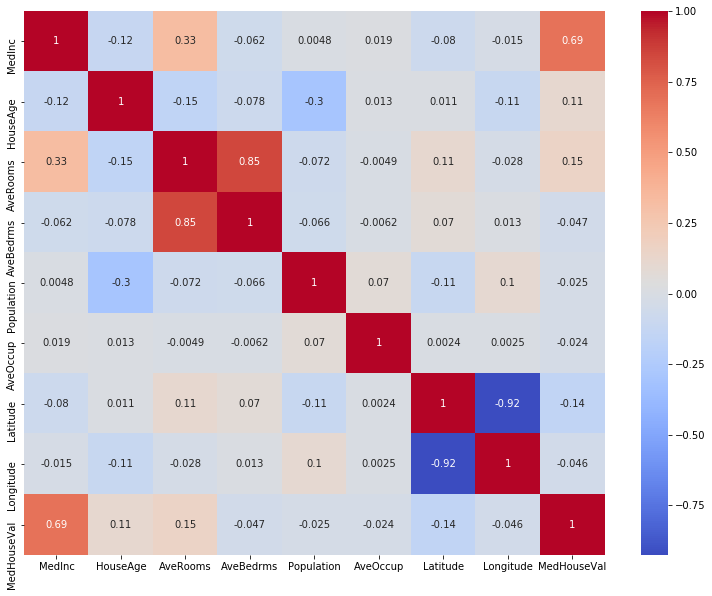

In [28]:
plt.figure(figsize=(13,10))
sns.heatmap(cor,cmap='coolwarm',annot=True)

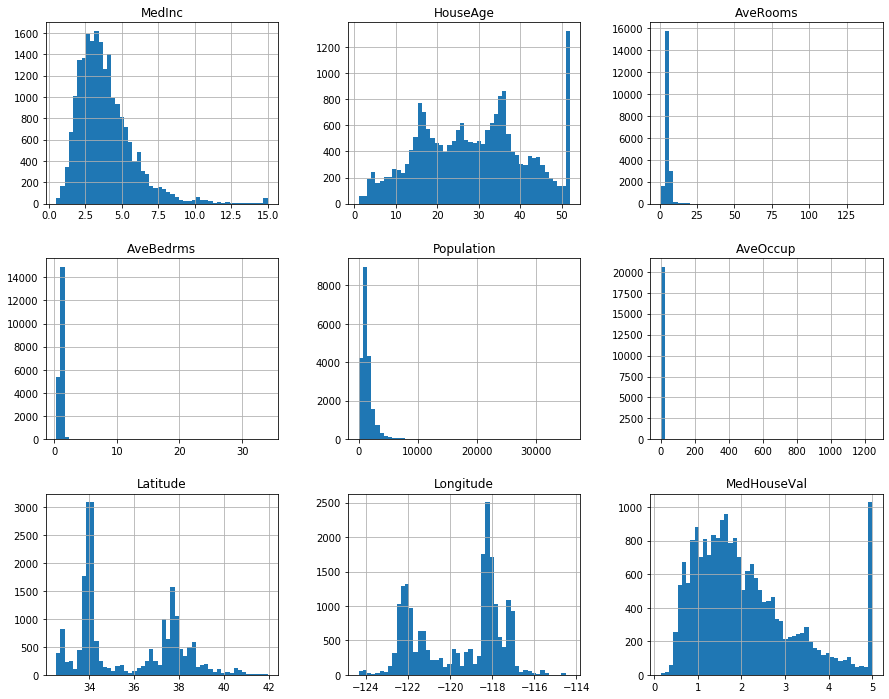

In [32]:

data.hist(bins=50,figsize=(15,12))
plt.show()

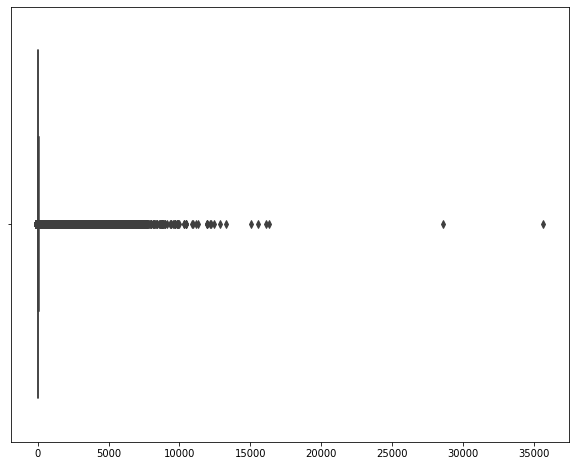

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(data)

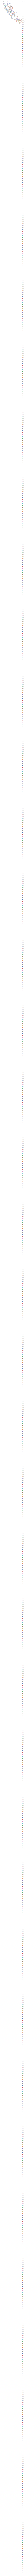

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['MedHouseVal'], palette='deep', alpha=0.5)
plt.show()

In [46]:
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [50]:
X=raw_data.data

In [51]:
Y=raw_data.target

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [53]:
model=LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
predictions=model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse=mean_squared_error(y_test,predictions)

In [59]:
mse

0.5305677824766754

In [61]:
from math import sqrt

In [63]:
rmse=sqrt(mse)
rmse

0.7284008391515453

In [64]:
from sklearn.metrics import mean_absolute_error,r2_score, median_absolute_error

In [65]:
mae=mean_absolute_error(y_test,predictions)
mae

0.527247453830616

In [66]:
r2score=r2_score(y_test,predictions)
r2score

0.5957702326061662

In [67]:
med=median_absolute_error(y_test,predictions)

In [68]:
med

0.4089588876796488

In [69]:
df_metrics=pd.DataFrame({
    'Metric':["MSE","RMSE","MAE","R2Score","MedianAE"],
    'Values':[mse,rmse,mae,r2score,med]
    
})

In [70]:
print(df_metrics)

     Metric    Values
0       MSE  0.530568
1      RMSE  0.728401
2       MAE  0.527247
3   R2Score  0.595770
4  MedianAE  0.408959
